In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import *
import time

import matplotlib.pyplot as plt
from mc_candidate_proposal.hough_mc import HoughCalcificationDetection

db = INBreast_Dataset(
    lesion_types=['calcification', 'cluster'],
    return_lesions_mask=True,
    level='image',
    max_lesion_diam_mm=None,
    partitions=['train', 'validation'],
    extract_patches=False,
    normalize=None,
    n_jobs=-1,
    cropped_imgs=True,
    use_muscle_mask=True
)

hd = HoughCalcificationDetection(filter_muscle_region=False)

for idx in tqdm(range(len(db))):
    image_id = db.df.iloc[idx].img_id
    view = image_id = db.df.iloc[idx]['view']
    if view != 'MLO':
        continue
    # extracting data
    db_sample = db[idx]
    image = db_sample['img']
    image_mask = db_sample['lesion_mask']
    muscle_mask = db_sample['muscle_mask']
    h1_circles = hd.detect(
        image, image_id, load_processed_images=True, hough2=False, muscle_mask=muscle_mask)[0]
    print(h1_circles.shape)
    hd.filter_muscle_region = True
    h1_circles = hd.detect(
        image, image_id, load_processed_images=True, hough2=False, muscle_mask=muscle_mask)[0]
    print(h1_circles.shape)
    break

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
  0%|          | 0/167 [00:00<?, ?it/s]

(1679, 3)


  1%|          | 2/167 [00:01<01:22,  1.99it/s]

(1554, 3)


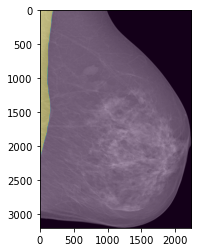

In [5]:
plt.imshow(db_sample['img'], cmap='gray')
plt.imshow(db_sample['muscle_mask'], alpha=0.3)